In [1]:
import numpy as np

from graphqec import RotatedSurfaceCode, ThresholdLAB

In [2]:
rsc = RotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

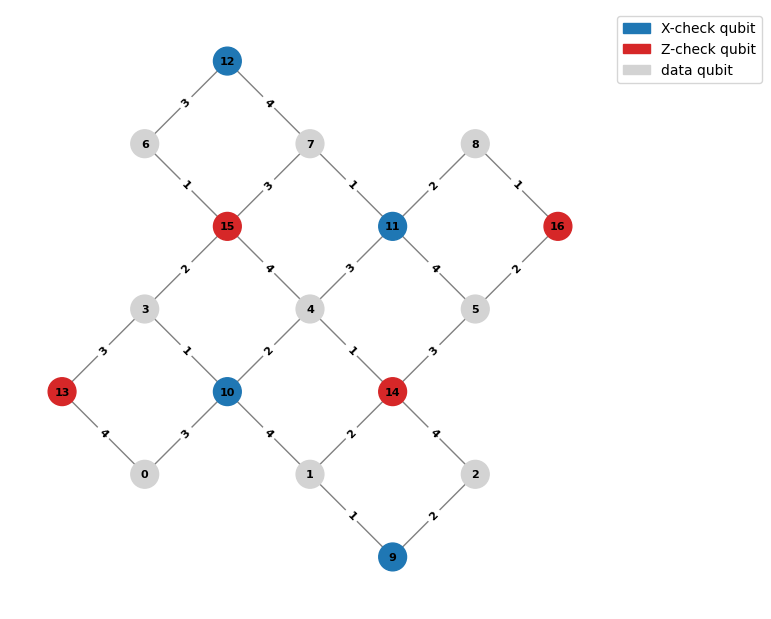

In [3]:
rsc.draw_graph()

In [4]:
rsc.build_memory_circuit(number_of_rounds=2, logic_check="Z")
rsc.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------M:rec[16]-DETECTOR:D12=rec[19]*rec[16]*rec[12]-----------------OBSERVABLE_INCLUDE:L0*=rec[16]*rec[17]*rec[18]-
                                                                                                                                                                                                                                                                                              | |                                                                                                                                                                                 | |                                                                                                                                                                                                                                                                                                                                                                                                                | |                                                                                                                                                                                 | |
 q1: -R-DEPOLARIZE1(0.01)---------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|----------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|----------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------M:rec[17]-DETECTOR:D13=rec[20]*rec[17]*rec[21]*rec[18]*rec[13]------------------------------------------------
                                              | |                                                                                                                                                                                 | |                                                         | |                                                                 

In [5]:
rsc.build_memory_circuit(number_of_rounds=2, logic_check="X")
rsc.memory_circuit.diagram()

q0: -RX-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------MX:rec[16]-DETECTOR:D13=rec[19]*rec[20]*rec[16]*rec[17]*rec[9]--OBSERVABLE_INCLUDE:L0*=rec[16]*rec[19]*rec[22]-
                                                                                                                                                                                                                                                                                               | |                                                                                                                                                                                 | |                                                                                                                                                                                                                                                                                                                                                                                                                  | |                                                                                                                                                                                 | |
 q1: -RX-DEPOLARIZE1(0.01)---------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------|-|---------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------|-|----------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------MX:rec[17]-DETECTOR:D12=rec[17]*rec[18]*rec[8]-----------------------------------------------------------------
                                               | |                                                                                                                                                                                 | |                                                         | |                                                     

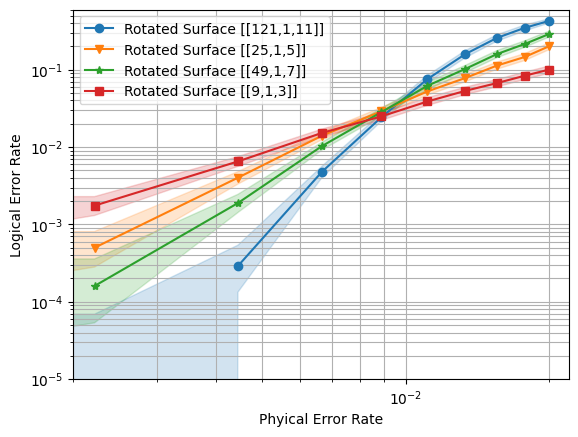

In [25]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = RotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
    
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="Z"
)

th.plot_stats(
    x_min = 2e-3, 
    x_max = 2.2e-2,
    y_min = 1e-5, 
    y_max = 6e-1
)

In [26]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = RotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
    
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="X"
)

th.plot_stats(
    # x_min = 2e-2, 
    # x_max = 2e-1,
    # y_min = 1e-4, 
    # y_max = 8e-1
)

ValueError: Worker failed: traceback=Traceback (most recent call last):
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 28, in _fill_in_task
    dem = circuit.detector_error_model(decompose_errors=True, approximate_disjoint_errors=True)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D179', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D179 > output_image.svg

This was discovered while analyzing an X-basis reset (RX) on:
    qubit 240

The collapse anti-commuted with these detectors/observables:
    D179

The backward-propagating error sensitivity for D179 was:
    Z240

Circuit stack trace:
    at instruction #1 [which is RX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 31, in _fill_in_task
    dem = circuit.detector_error_model(approximate_disjoint_errors=True)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D179', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D179 > output_image.svg

This was discovered while analyzing an X-basis reset (RX) on:
    qubit 240

The collapse anti-commuted with these detectors/observables:
    D179

The backward-propagating error sensitivity for D179 was:
    Z240

Circuit stack trace:
    at instruction #1 [which is RX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 243, in run_message_loop
    num_messages_processed = self.process_messages()
                             ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 175, in process_messages
    self.compute_strong_id(new_task=message_body)
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 133, in compute_strong_id
    strong_id = _fill_in_task(new_task).strong_id()
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 33, in _fill_in_task
    dem = circuit.detector_error_model(approximate_disjoint_errors=True, flatten_loops=True)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D179', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D179 > output_image.svg

This was discovered while analyzing an X-basis reset (RX) on:
    qubit 240

The collapse anti-commuted with these detectors/observables:
    D179

The backward-propagating error sensitivity for D179 was:
    Z240

Circuit stack trace:
    at instruction #1 [which is RX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240]
